Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.

The key features of the wine quality dataset and their importance in predicting the quality of wine:

1. Fixed Acidity: 
Fixed acidity refers to the concentration of nonvolatile acids in the wine. It is an essential factor as acidity influences the taste and stability of wines. It contributes to the wine's overall flavor profile and balance.

2. Volatile Acidity: 
Volatile acidity measures the concentration of volatile acids, primarily acetic acid, in the wine. Higher levels of volatile acidity can lead to a vinegar-like smell and undesirable taste. It's crucial to maintain appropriate levels for a balanced flavor.

3. Citric Acid: 
Citric acid is a natural component of many fruits and can contribute to the wine's freshness and acidity. It can enhance the perception of fruity flavors and balance the overall taste.

4. Residual Sugar: 
Residual sugar is the amount of sugar remaining in the wine after fermentation. It affects the wine's sweetness and can influence the perception of body and mouthfeel.

5. Chlorides: 
Chlorides are salts that can impact the wine's taste, mouthfeel, and balance. Appropriate chloride levels are essential for achieving a desirable flavor profile.

6. Free Sulfur Dioxide: 
Free sulfur dioxide acts as an antioxidant and preservative in wine. It helps prevent spoilage and oxidation, contributing to the wine's stability and longevity.

7. Total Sulfur Dioxide: 
Total sulfur dioxide includes both free and bound sulfur dioxide. It plays a role in preserving wine and preventing microbial growth.

8. Density: 
Density is related to the sugar and alcohol content in the wine. It can give an indication of the wine's body and richness.

9. pH: 
pH is a measure of the wine's acidity level. It affects taste, color stability, and the overall chemistry of the wine.

10. Sulphates: 
Sulphates are additives that can affect the wine's flavor and aroma. They are often used to improve fermentation and stabilization.

11. Alcohol: 
Alcohol content significantly influences the wine's body, mouthfeel, and overall perception of warmth and balance.

Machine learning models can analyze these features to predict the quality of the wine based on historical patterns in the dataset. By understanding how these features influence wine quality, researchers and analysts can build more accurate models and gain insights into the factors that make a wine more desirable or less desirable to consumers.

Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.

There was no missing data in the wine quality data set.

The advantages and disadvantages of different imputation techniques:
1. Deletion of Missing Data (Advantages/Disadvantages):
Advantages: Deleting rows with missing data is straightforward and reduces the complexity of the dataset. It can be suitable when the proportion of missing data is small.\
Disadvantages: This approach can result in loss of valuable information, especially if the missing data is not randomly distributed. It may lead to biased analysis and inaccurate model predictions. Additionally, if a large portion of the data is missing, deletion can significantly reduce the dataset size.

2. Mean/Median Imputation (Advantages/Disadvantages):
Advantages: Imputing missing values with the mean or median of the available data helps retain the overall distribution and variability of the feature. It's simple to implement and can work well when missingness is random.\
Disadvantages: This method doesn't consider relationships between features, potentially introducing bias in the imputed values. It can also underestimate the variability of the imputed values.

3. Mode Imputation (Advantages/Disadvantages):
Advantages: Mode imputation is suitable for categorical variables. It preserves the mode of the feature and is simple to apply.\
Disadvantages: Like mean/median imputation, mode imputation may not accurately capture relationships between variables.

Q3. What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?

The student’s performance (test scores) is affected by key factors such as Gender, Race Ethnicity, Parental level of education, and Lunch and Test preparation course.

Data Checks Performed: 
1. Check Missing values
2. Check Duplicates
3. Check data type
4. Check the number of unique values in each column
5. Check the statistics of the data set
6. Check various categories present in the different categorical column

In [1]:
## importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('stud.csv')  ## load dataset
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [3]:
## 1. Check Missing Values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Observation: there are no missing values in the dataset.

In [4]:
## 2. Check Duplicates
df.duplicated().sum()

0

Observation: There are no duplicates values in the dataset.

In [5]:
## 3. Check the Data Types
#check the null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
## 4. Check the Number of Unique Values in Each Column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [7]:
## 5. Check Statistics of the Data Set
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights:

1. The numerical data shown above shows that all means are fairly similar to one another, falling between 66 and 68.05.
2. The range of all standard deviations, between 14.6 and 15.19, is also narrow.
3. While there is a minimum score of 0 for math, the minimums for writing and reading are substantially higher at 10 and 17, respectively.
4. We don’t have any duplicate or missing values, and the process will provide a good data checking.

In [8]:
## 6. Check various categories present in the different categorical column
print("Categories in 'gender' variable: ",end=" ")
print(df["gender"].unique())

print("Categories in 'race/ethnicity' variable: ",end=" ")
print(df["race_ethnicity"].unique())

print("Categories in 'parental level of education' variable: ",end=" ")
print(df["parental_level_of_education"].unique())

print("Categories in 'lunch' variable: ",end=" ")
print(df["lunch"].unique())

print("Categories in 'test preparation course' variable: ",end=" ")
print(df["test_preparation_course"].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [9]:
## 7. We define the numerical and categorical columns: 
## separate the numerical and categorical features and count the feature values
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"] 
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"] 

print("We have {} numerical features: {}".format(len(numeric_features),numeric_features))
print("We have {} categorical features: {}".format(len(categorical_features),categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Exploring Data (Visualization): Visualize Average Score Distribution to Make Some Conclusion
1. Histogram
2. Kernel Distribution Function (KDE)
3. Histogram & KDE

In [10]:
## Gender Column

df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

Observation: Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

In [12]:
## Race Ethnicity Column

df['race_ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64

Insights:

1. Most of the student belonging from group C /group D.
2. Lowest number of students belong to group A.

In [14]:
## Parental Level of Education Column
df['parental_level_of_education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

Insights:

Largest number of parents are from some college and associate's degree.

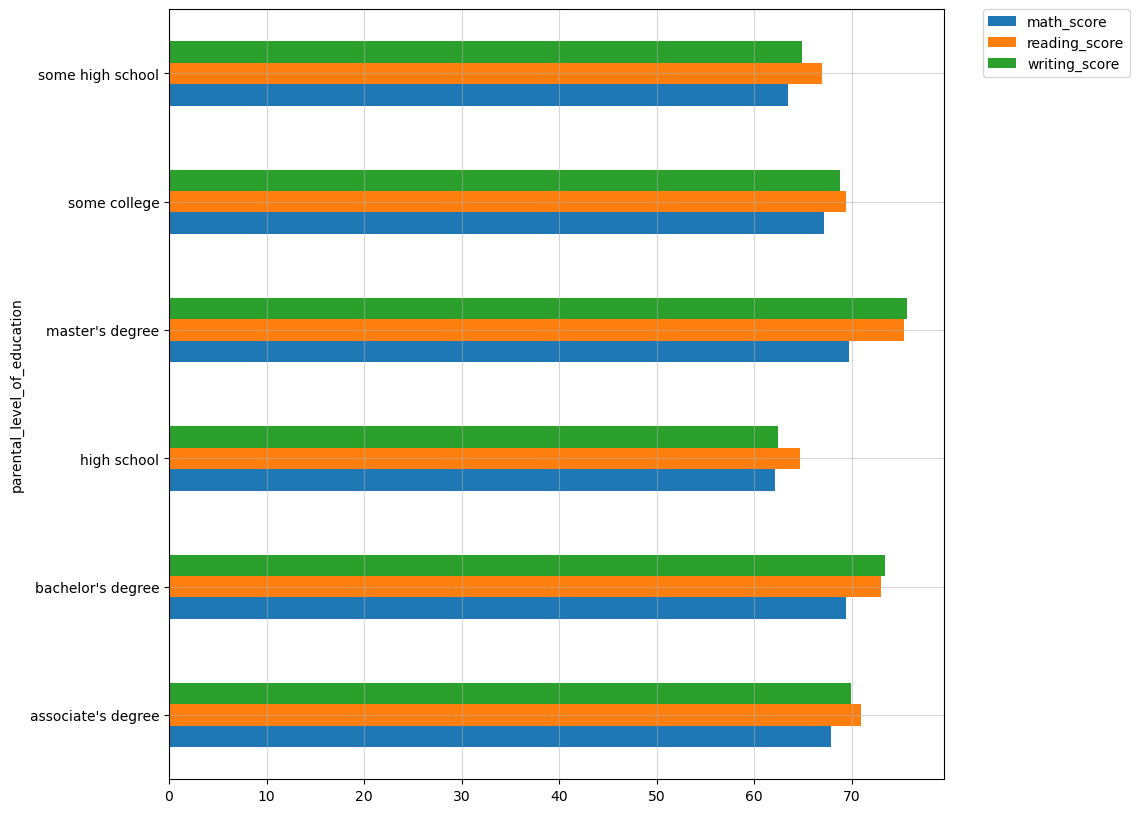

In [16]:
## Bivariate Analysis
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(alpha=0.5)
plt.show()

Insights:

The score of student whose parents possess master and bachelor level education are higher than others.

In [17]:
## agregate the total score with mean
df['total_score'] = (df['math_score'] + df['reading_score'] + df['writing_score'])
df['average'] = df['total_score'] / 3

In [18]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


<AxesSubplot: xlabel='average', ylabel='Count'>

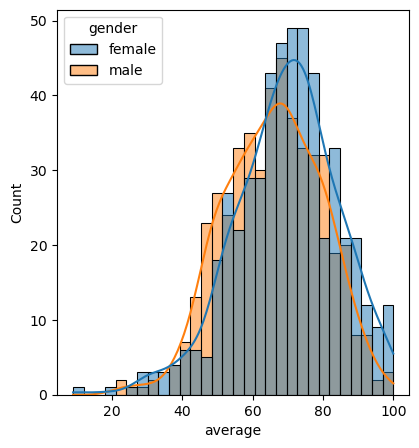

In [19]:
fig, axis = plt.subplots(figsize=(10, 5))   ## 1 row 2 colums
plt.subplot(121)  ## 1st row adn 2 column's 1st plot
sns.histplot(data=df, x='average', bins=30, kde=True, hue='gender')

Observation: Female Students lead in exam performnace and also are top-scorers.

<AxesSubplot: xlabel='average', ylabel='Count'>

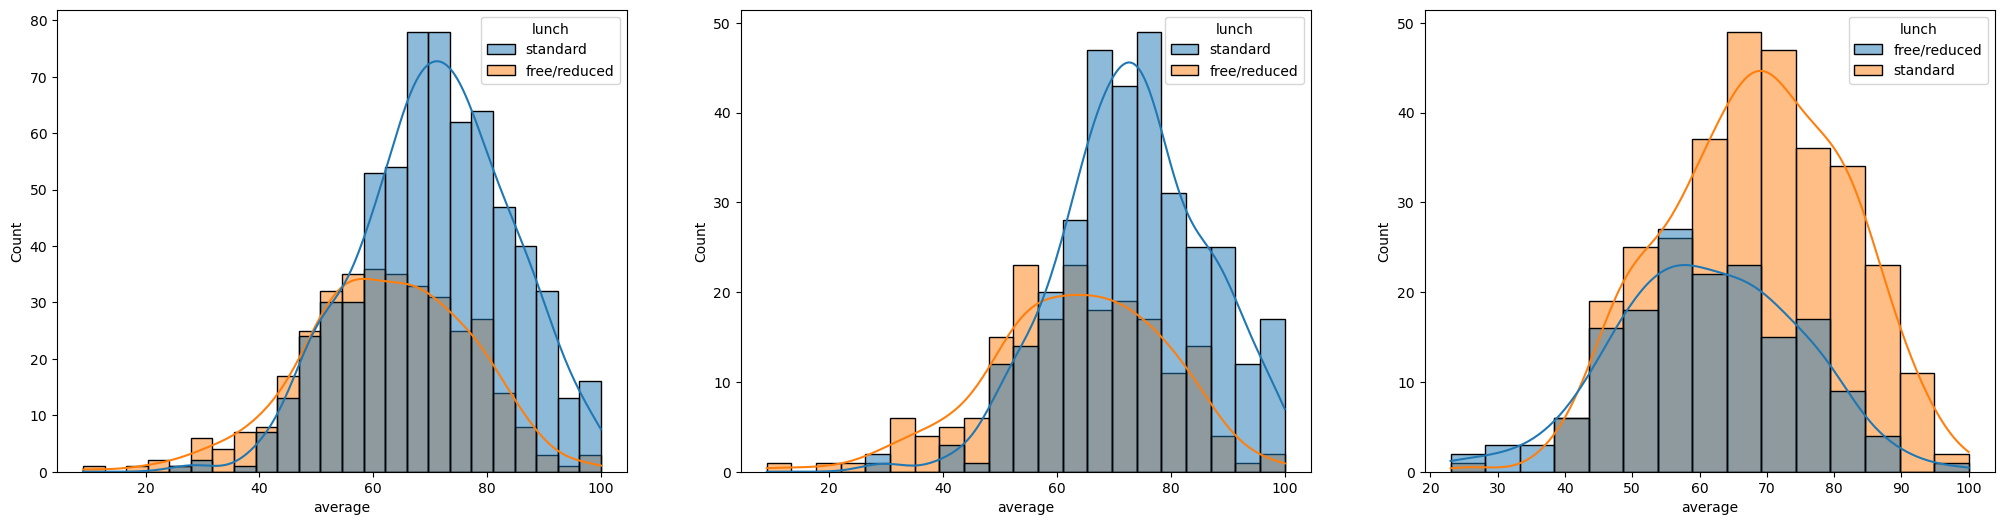

In [20]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')

Insights:

1. Standard lunch help students perform well in exams 
2. Standard lunch helps perform well in exams be it a male or female student

<AxesSubplot: xlabel='average', ylabel='Count'>

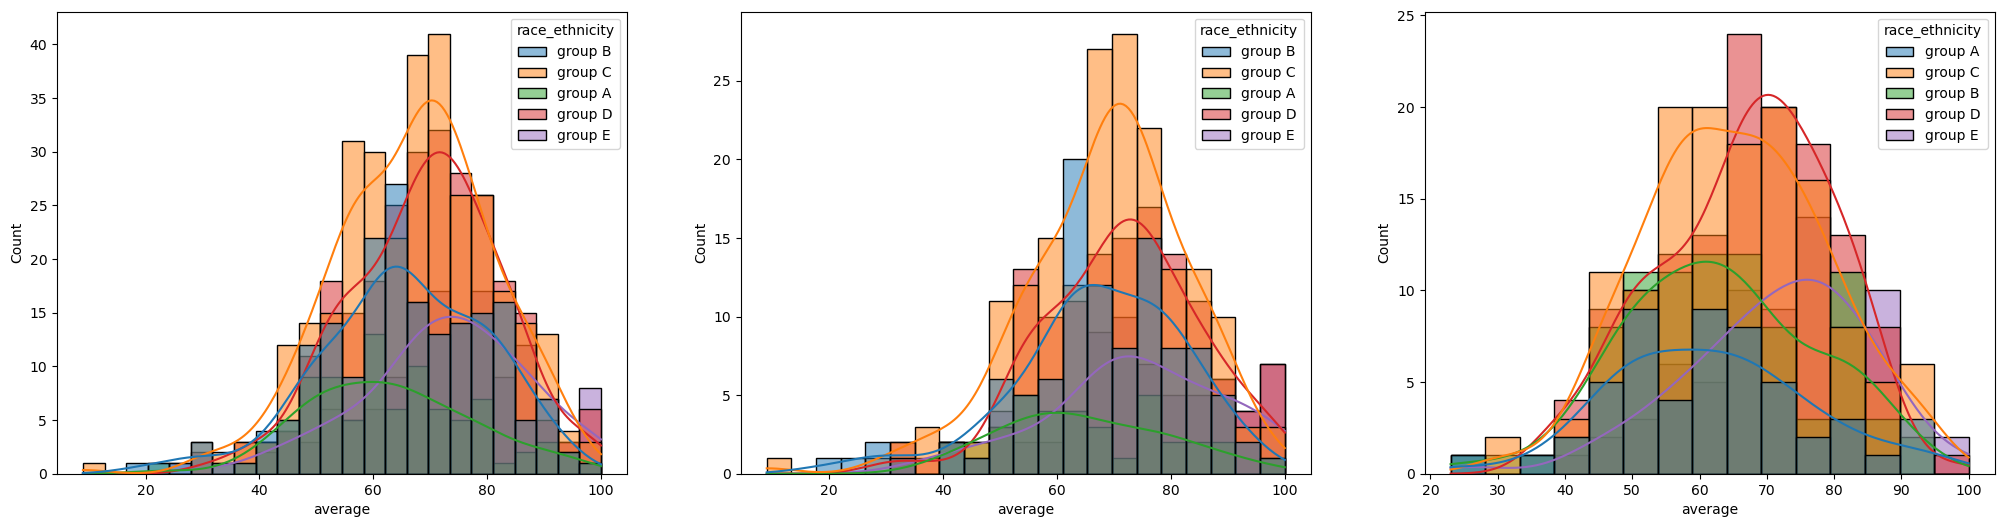

In [21]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race_ethnicity')

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race_ethnicity')

Insights:

1. Students of group A and Group B tend to perform poorly in exam (average is right skewed)
2. Students of group A and Group B tend to perform poorly in exam be it male or female (average is right skewed)

Q4. Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?

Here's a general process of feature engineering for the student performance dataset:

1. Understanding the Data:
Start by understanding the structure of the dataset, the meaning of each variable, and the relationships between variables.
Identify the target variable you want to predict and potential predictors (features) that could influence it.

2. Data Checks Performed:
i. Check Missing values\
ii. Check Duplicates\
iii. Check data type\
iv. Check the number of unique values in each column\
v. Check the statistics of the data set\
vi. Check various categories present in the different categorical column

3. Handling Missing Values and Duplicate values (if exists):
Decide how to handle missing values. You might choose to delete rows with missing values, impute missing values using mean/median/mode, or use more advanced imputation techniques. Delete duplicates to improve model performance.

4. Handling Categorical Variables:
The features gender, race_ethnicity, parental_level_of_education, lunch and test preparation course are categorical variables, which means they need to be converted into numerical representations before feeding them into machine learning models.\
One-hot encoding is a common technique to handle categorical variables. It creates binary columns for each category within a categorical variable.
For example, the race ethnicity feature.\
If a categorical variable has only two categories (binary), you can use label encoding, which assigns 0 and 1 to the categories.\
For example, the lunch feature could be encoded as lunch_standard and lunch_free_reduced, where 0 represents standard lunch and 1 represents free/reduced lunch, also for test preparation course and gender.

5. Encoding Ordinal Variables:
If you have ordinal variables (e.g., parental education level), encode them appropriately by assigning numerical values that reflect the order.

6. Feature Creation:
Create new features that might have predictive power. For instance, you could calculate the total score by summing up the math, reading, and writing scores.
Create new feature calcualting the average of total scores

Feature engineering is often an iterative process. After building and evaluating models, you might discover that certain features need further refinement or new features are needed.

In [22]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [23]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

In [24]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [25]:
# Label Encoding (for binary variables)
label_encoders = ['gender', 'lunch', 'test_preparation_course']
le = LabelEncoder()
for feature in label_encoders:
    df[feature + '_encoded'] = le.fit_transform(df[feature])

In [26]:
# Ordinal Encoding (for ordinal variable: parental_level_of_education)
ordinal_encoder = OrdinalEncoder(categories=[
    ['some high school', 'high school', 'some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree']
])
df['parental_level_of_education_encoded'] = ordinal_encoder.fit_transform(df[['parental_level_of_education']])

In [27]:
# Extract the 'race_ethnicity' feature
race_ethnicity = df[['race_ethnicity']]

# Apply One-Hot Encoding to 'race_ethnicity' without dropping categories
ohe = OneHotEncoder(sparse=False, drop=None)
race_ethnicity_encoded = ohe.fit_transform(race_ethnicity)

# Create a DataFrame with the encoded features and column names
race_ethnicity_encoded_df = pd.DataFrame(
    race_ethnicity_encoded,
    columns=[f'race_ethnicity_{i}' for i in ohe.categories_[0]]
)

# Concatenate the encoded DataFrame with the original DataFrame
df = pd.concat([df, race_ethnicity_encoded_df], axis=1)

In [30]:
## dropping previous categorical columns
df_copy = df.copy()

In [31]:
df_copy = df_copy.drop(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'], axis=1)

In [33]:
df_copy.head()

,math_score,reading_score,writing_score,total_score,average,gender_encoded,lunch_encoded,test_preparation_course_encoded,parental_level_of_education_encoded,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E
0,72,72,74,218,72.666667,0,1,1,4.0,0.0,1.0,0.0,0.0,0.0
1,69,90,88,247,82.333333,0,1,0,2.0,0.0,0.0,1.0,0.0,0.0
2,90,95,93,278,92.666667,0,1,1,5.0,0.0,1.0,0.0,0.0,0.0
3,47,57,44,148,49.333333,1,0,1,3.0,1.0,0.0,0.0,0.0,0.0
4,76,78,75,229,76.333333,1,1,1,2.0,0.0,0.0,1.0,0.0,0.0


Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?

In [35]:
## importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [36]:
## load dataset
df = pd.read_csv('winequality-red.csv')

In [38]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [39]:
## shape of data
df.shape

(1599, 12)

Observation: The shape of the data is (1599,12), which shows there are 1599 rows and 12 columns in the data.

In [42]:
## To know the columns of the data, we can do df.columns, it will give all the features name present in the data.
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [44]:
## The describe () function in Python summarizes statistics. 
## This function returns the count, mean, standard deviation, minimum and maximum values, and the quantiles of the data.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Observations:
    
1. There is a large difference between the 75th% tile and max values of residual sugar, free sulfur dioxide & total sulfur dioxide.

In [45]:
## Checking missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Observation: There is no missing data.

In [47]:
## df.info return information about the data frame including the data types of each column and memory usage of the entire data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Observation: Data has only float and integer values.

In [48]:
## the number of unique values in each of the features
for col in df.columns.values:
    print(f'Number of unique values of {col} : {df[col].nunique()}')

Number of unique values of fixed acidity : 96
Number of unique values of volatile acidity : 143
Number of unique values of citric acid : 80
Number of unique values of residual sugar : 91
Number of unique values of chlorides : 153
Number of unique values of free sulfur dioxide : 60
Number of unique values of total sulfur dioxide : 144
Number of unique values of density : 436
Number of unique values of pH : 89
Number of unique values of sulphates : 96
Number of unique values of alcohol : 65
Number of unique values of quality : 6


Observations:

1. The feature that has a maximum unique value is density.
2. The feature that has a minimum unique value is quality.

In [50]:
## check duplicates
df.duplicated().sum()

240

In [51]:
## removing duplicates
df.drop_duplicates(inplace=True)

In [53]:
## check duplicates
df.duplicated().sum()

0

In [60]:
## seaborn.catplot — 
## show the relationship between a numerical and one or more categorical variables using one of several visual representations

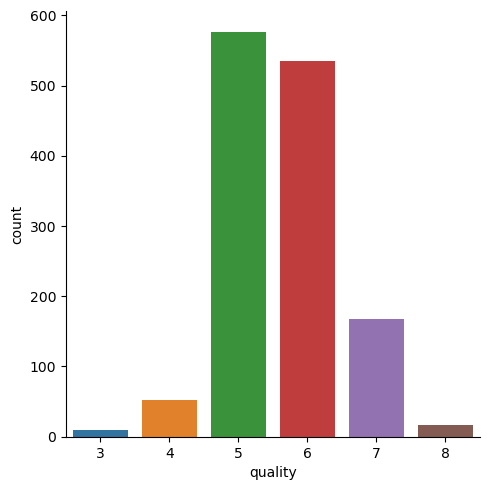

In [54]:
sns.catplot(x='quality', data=df, kind='count')

Observations:

1. "quality" has a high number of values in categories 5, 6 and 7.
2. Only a few observations are there for the categories 3 & 9.

<AxesSubplot: >

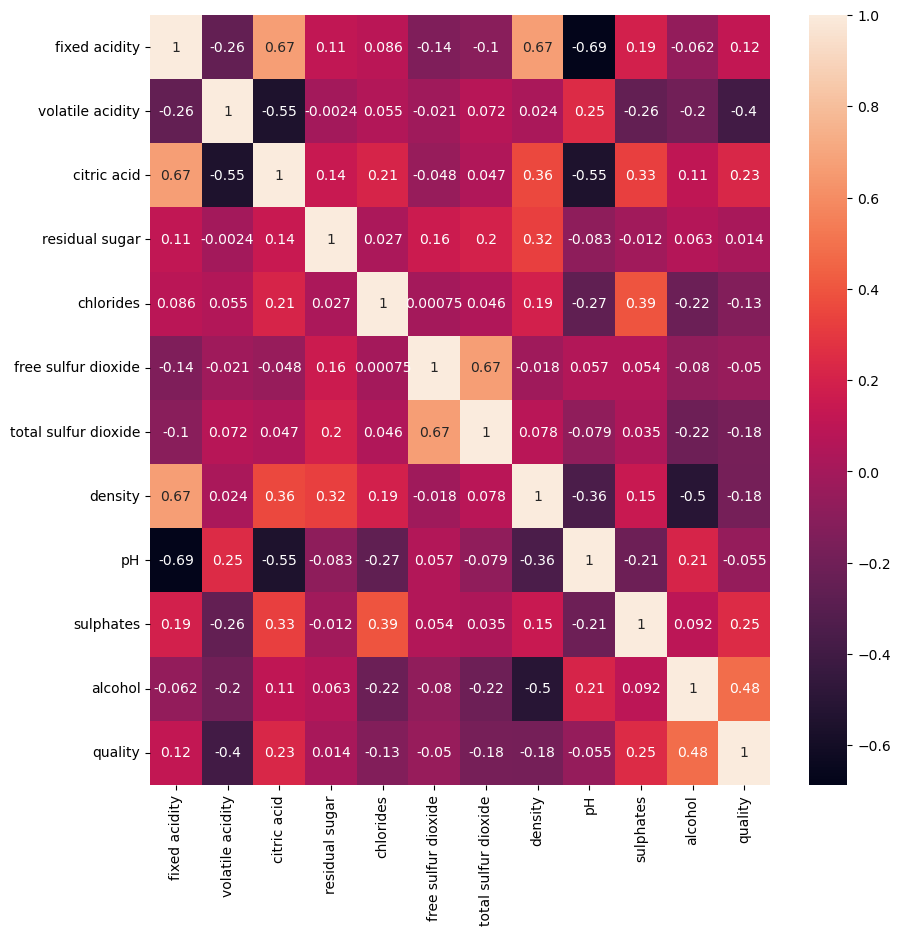

In [55]:
## find correlations using pandas ".corr()" function and can visualize the correlation matrix using a heatmap in seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

Observations:
    
1. density has a strong positive correlation with fixed_acidity, whereas it has a strong negative correlation with alcohol.
2. pH & fixed acidity has negative correlation.
3. density & residual sugar has positive correlation.
4. citric acid & fixed acidity has positive correlation.
5. citric acid & volatile acidity has negative correlation.
6. free sulphur dioxide & total sulphur dioxide has positive correlation.

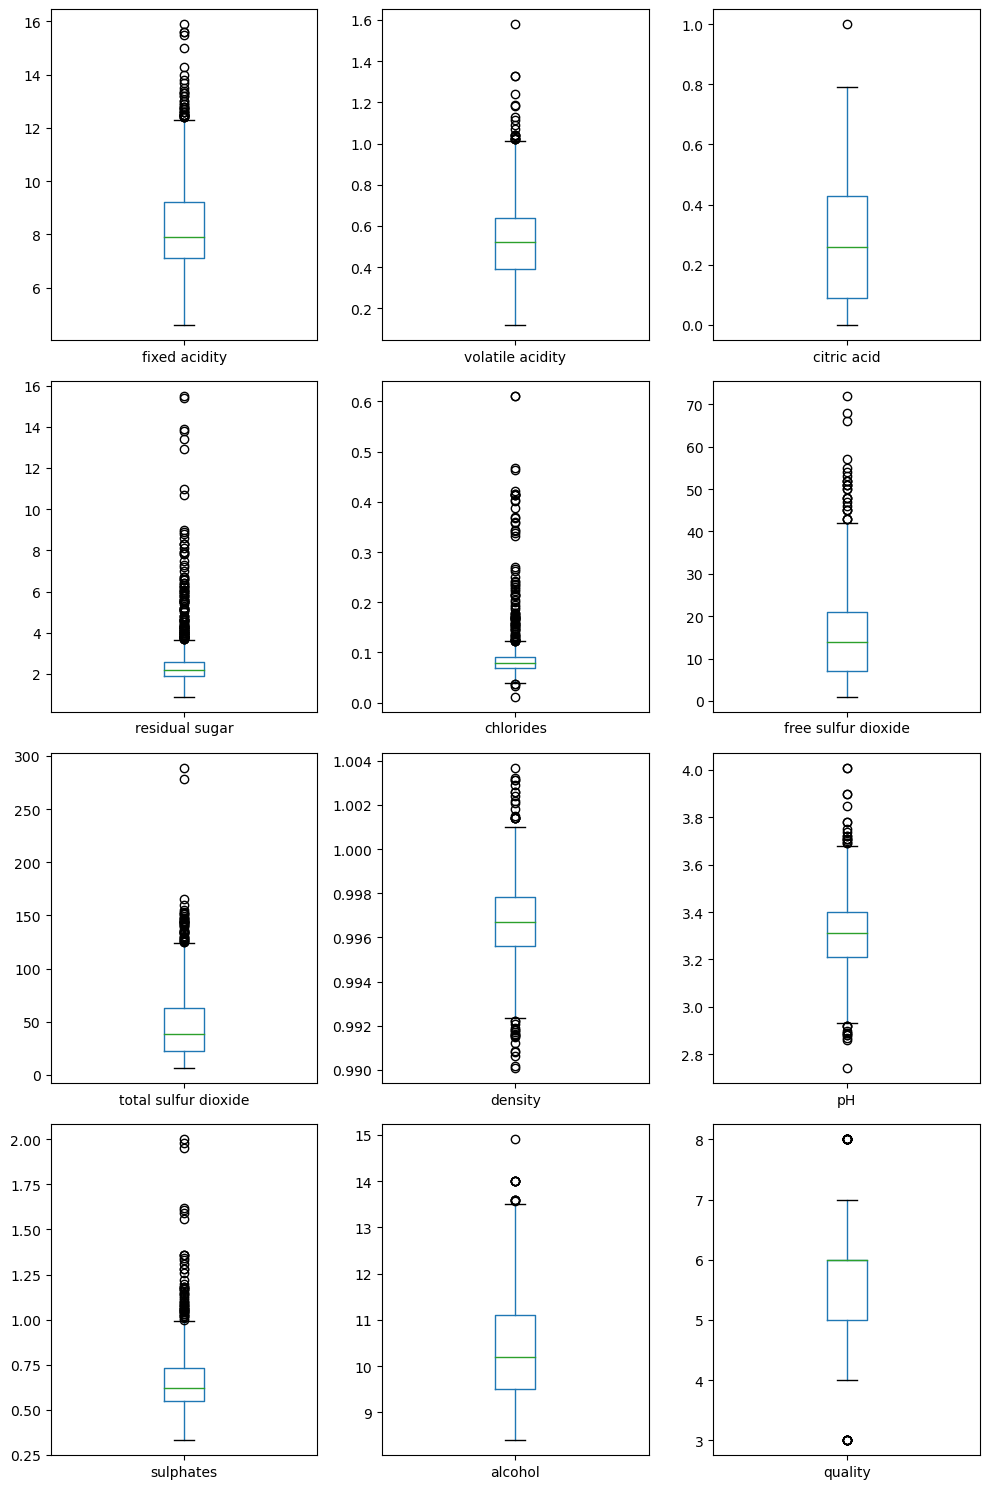

In [56]:
## boxplot displays the five-number summary of a set of data
## helps locating outliers

plt.figure(figsize=(10, 15))
for i, col in enumerate(list(df.columns.values)):
    plt.subplot(4,3, i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()

Observations:
    
All features have outliers.

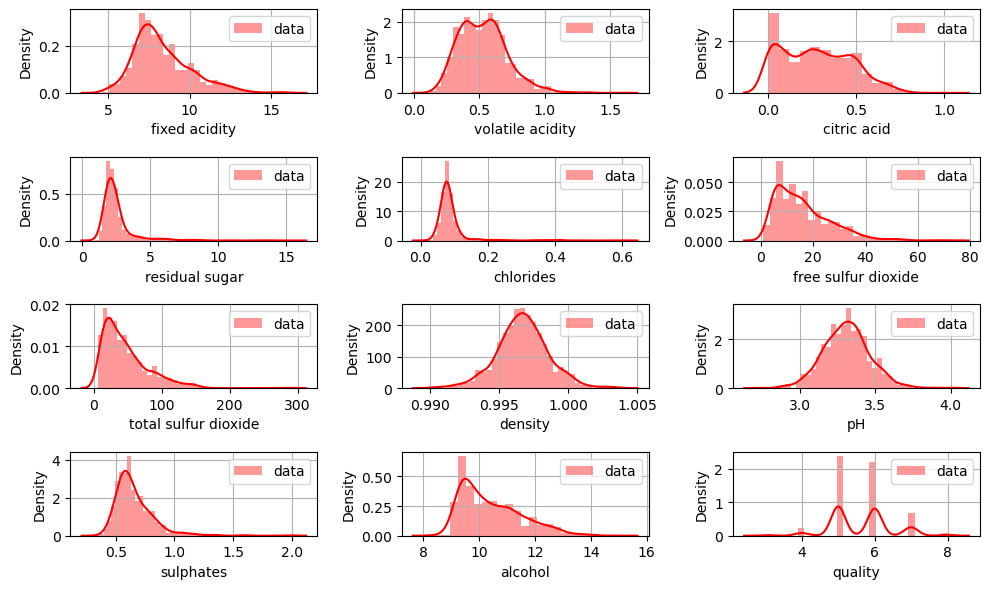

In [63]:
## seaborn.distplot- This function plots the estimated PDF over the data
plt.figure(figsize=(10, 6))
for i, col in enumerate(list(df.columns.values)):
    plt.subplot(4,3, i+1)
    sns.distplot(df[col], color='r', kde=True, label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

Observations:
    
1. pH and density feature is approximately normally distributed.
2. Remaining all independent features are positively skewed (right skewed).

Features with high skewness, or those that visually deviate from a bell-shaped curve, might be considered non-normal.

For features that are not normally distributed, we can apply various transformations to make them closer to a normal distribution. Common transformations include:

1. Log Transformation: Useful for reducing right-skewness.
2. Square Root Transformation: Can help with reducing skewness.
3. Box-Cox Transformation: A power transformation that can handle a range of transformations, including logarithmic and square root transformations.

Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?

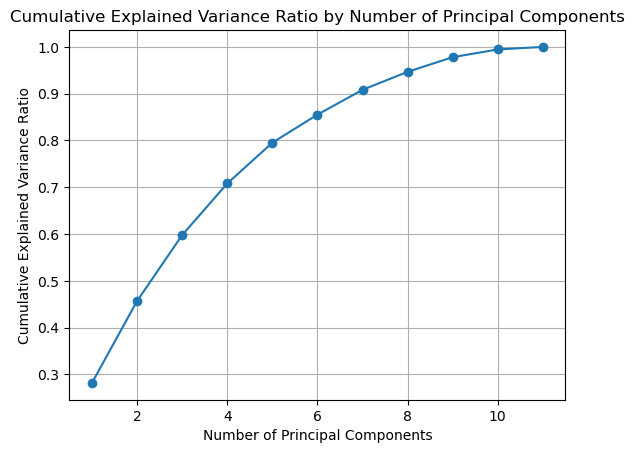

Minimum number of principal components to explain 90% variance: 7


In [64]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the wine quality dataset
data = pd.read_csv('winequality-red.csv')

# Separate features and target variable
X = data.drop(columns=['quality'])
y = data['quality']

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
pca.fit(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot cumulative explained variance ratio
cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Principal Components')
plt.grid(True)
plt.show()

# Find the minimum number of principal components to explain 90% of variance
n_components_90 = (explained_variance_ratio.cumsum() <= 0.90).sum() + 1
print("Minimum number of principal components to explain 90% variance:", n_components_90)